In [1]:
import pandas
from pandas import read_excel, date_range, DatetimeIndex, DataFrame, to_numeric, concat, to_datetime
from pandas.plotting import lag_plot, autocorrelation_plot
from pandas.tseries.offsets import DateOffset

import numpy
from numpy import logical_not

import statistics
import dateutil.relativedelta
from dateutil.relativedelta import relativedelta

import fbprophet
from fbprophet import Prophet

import calendar
from calendar import monthrange

from datetime import datetime, timedelta
from matplotlib import pyplot

from sklearn.metrics import mean_absolute_error, mean_squared_error

from math import sqrt

Importing plotly failed. Interactive plots will not work.


In [2]:
# cambiamos el valor de estos 4 parametros para que nos muestre dataframes truncados o sin truncar
pandas.set_option('display.max_rows', 12)
# pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [3]:
# Load data using read_excel
transacciones_df = read_excel('20210513 mmelero (249236).xlsx', sheet_name='Hoja1')
transacciones_df

Fecha transacción  Importe  ID Categoría           Nombre categoría  \
0           2020-07-24    -1.20          84.0                 parking_84   
1           2020-07-23    -4.50         117.0  regalos_celebraciones_117   
2           2020-07-23   -13.53          70.0           supermercados_70   
3           2020-07-22   -51.40         222.0                   adsl_222   
4           2020-07-22   -11.00          70.0           supermercados_70   
...                ...      ...           ...                        ...   
1482        2016-09-05  1533.02          18.0     retribucion_liquida_18   
1483        2016-09-05  -617.47         126.0    liquidacion_tarjeta_126   
1484        2016-09-05  -138.08         125.0                 cuotas_125   
1485        2016-09-01   -32.22          90.0            seguro_salud_90   
1486        2016-09-01   -33.00         434.0                 cuotas_434   

      Nivel categoría  iD categoría padre Nombre categoría padre  \
0                 2.0                 5.0            vehiculos_5   
1                 2.0                 8.0    gastos_personales_8   
2                 2.0                 4.0         alimentacion_4   
3                 3.0               521.0    Comunicaciones y TV   
4                 2.0                 4.0         alimentacion_4   
...               ...                 ...                    ...   
1482              3.0               576.0                 Nómina   
1483              3.0               478.0   tarjetas_credito_478   
1484              3.0               127.0      otros_pasivos_127   
1485              2.0                 6.0                salud_6   
1486              3.0               115.0           deportes_115   

                    Proveedor               Marca  \
0                         NaN                 NaN   
1                         NaN                 NaN   
2                        SPAR                SPAR   
3                Jazz Telecom             Jazztel   
4                   Mercadona           Mercadona   
...                       ...                 ...   
1482                      NaN                 NaN   
1483                      NaN                 NaN   
1484                      NaN                 NaN   
1485  Sanitas S.A. de Seguros             Sanitas   
1486       Royal Sport Center  Royal Sport Center   

                            Sector  Financiero  Transferencia  Unnamed: 12  \
0                              NaN       False          False          NaN   
1                              NaN       False          False          NaN   
2                    Supermercados       False          False          NaN   
3     Compañías telecomunicaciones       False          False          NaN   
4                    Supermercados       False          False          NaN   
...                            ...         ...            ...          ...   
1482                           NaN       False          False          NaN   
1483                           NaN        True           True          NaN   
1484                           NaN        True          False          NaN   
1485              Seguros de salud        True          False          NaN   
1486              Clubs deportivos       False          False          NaN   

      Unnamed: 13        ID  BALANCE BALANCE_DATE  
0             NaN  249236.0  1478.98   2020-07-26  
1             NaN       NaN      NaN          NaT  
2             NaN       NaN      NaN          NaT  
3             NaN       NaN      NaN          NaT  
4             NaN       NaN      NaN          NaT  
...           ...       ...      ...          ...  
1482          NaN       NaN      NaN          NaT  
1483          NaN       NaN      NaN          NaT  
1484          NaN       NaN      NaN          NaT  
1485          NaN       NaN      NaN          NaT  
1486          NaN       NaN      NaN          NaT  

[1487 rows x 17 columns]

In [4]:
# nos quedamos con la fecha en que nos dan los datos de las transacciones
last_date_tstamp = transacciones_df.loc[0,'BALANCE_DATE']
last_date_tstamp

Timestamp('2020-07-26 00:00:00')

In [5]:
# nos quedamos con las transacciones de la categoría 'seguro_vehiculo_78'
transacciones_78_df = transacciones_df[transacciones_df['ID Categoría'] == 78.0]
del transacciones_df
transacciones_78_df

Fecha transacción  Importe  ID Categoría    Nombre categoría  \
174         2019-10-11  -126.10          78.0  seguro_vehiculo_78   
301         2019-04-10  -400.00          78.0  seguro_vehiculo_78   
505         2018-10-11  -126.13          78.0  seguro_vehiculo_78   
968         2017-10-11  -124.74          78.0  seguro_vehiculo_78   
1455        2016-10-13  -123.10          78.0  seguro_vehiculo_78   

      Nivel categoría  iD categoría padre Nombre categoría padre  \
174               2.0                 5.0            vehiculos_5   
301               2.0                 5.0            vehiculos_5   
505               2.0                 5.0            vehiculos_5   
968               2.0                 5.0            vehiculos_5   
1455              2.0                 5.0            vehiculos_5   

                                                       Proveedor  \
174   Línea Directa Aseguradora Compañía de Seguros y Reaseguros   
301                                                          NaN   
505   Línea Directa Aseguradora Compañía de Seguros y Reaseguros   
968   Línea Directa Aseguradora Compañía de Seguros y Reaseguros   
1455  Línea Directa Aseguradora Compañía de Seguros y Reaseguros   

                          Marca   Sector  Financiero  Transferencia  \
174   Línea Directa Aseguradora  Seguros        True          False   
301                         NaN      NaN        True          False   
505   Línea Directa Aseguradora  Seguros        True          False   
968   Línea Directa Aseguradora  Seguros        True          False   
1455  Línea Directa Aseguradora  Seguros        True          False   

      Unnamed: 12  Unnamed: 13  ID  BALANCE BALANCE_DATE  
174           NaN          NaN NaN      NaN          NaT  
301           NaN          NaN NaN      NaN          NaT  
505           NaN          NaN NaN      NaN          NaT  
968           NaN          NaN NaN      NaN          NaT  
1455          NaN          NaN NaN      NaN          NaT

In [6]:
# nos quedamos con categoría desde 'Fecha transacción' hasta 'Nombre Categoría'
transacciones_78_df = transacciones_78_df.iloc[:, 0:4]
transacciones_78_df

Fecha transacción  Importe  ID Categoría    Nombre categoría
174         2019-10-11  -126.10          78.0  seguro_vehiculo_78
301         2019-04-10  -400.00          78.0  seguro_vehiculo_78
505         2018-10-11  -126.13          78.0  seguro_vehiculo_78
968         2017-10-11  -124.74          78.0  seguro_vehiculo_78
1455        2016-10-13  -123.10          78.0  seguro_vehiculo_78

In [7]:
# quitamos las columnas de 'ID Categoría' y 'Nombre Categoría' que ya no nos aportan nada
transacciones_78_df.drop(columns = ['ID Categoría', 'Nombre categoría'], inplace=True)
transacciones_78_df

Fecha transacción  Importe
174         2019-10-11  -126.10
301         2019-04-10  -400.00
505         2018-10-11  -126.13
968         2017-10-11  -124.74
1455        2016-10-13  -123.10

In [8]:
# renombramos columnas
transacciones_78_df.rename(columns={'Fecha transacción': 'FECHA', 'Importe': 'IMPORTE'}, inplace=True)
transacciones_78_df

FECHA  IMPORTE
174  2019-10-11  -126.10
301  2019-04-10  -400.00
505  2018-10-11  -126.13
968  2017-10-11  -124.74
1455 2016-10-13  -123.10

In [9]:
# ordenamos las fechas por orden ascendente
transacciones_78_df.sort_values(by=['FECHA'], ascending=True, inplace=True, ignore_index=True)
transacciones_78_df

FECHA  IMPORTE
0 2016-10-13  -123.10
1 2017-10-11  -124.74
2 2018-10-11  -126.13
3 2019-04-10  -400.00
4 2019-10-11  -126.10

In [10]:
# vamos a agrupar los valores y sumarlos por fecha para agrupar cargos distintos realizados el mismo dia (por si acaso)
transacciones_78_df = transacciones_78_df.groupby(['FECHA']).sum()
transacciones_78_df

IMPORTE
FECHA              
2016-10-13  -123.10
2017-10-11  -124.74
2018-10-11  -126.13
2019-04-10  -400.00
2019-10-11  -126.10

In [11]:
"""
Hay un pago anual en octubre de 125 eur que debe ser el seguro de una moto.
Luego hay un pago en abril de 2019 de 400 eur que debe ser el seguro de un coche.
"""

'\nHay un pago anual en octubre de 125 eur que debe ser el seguro de una moto.\nLuego hay un pago en abril de 2019 de 400 eur que debe ser el seguro de un coche.\n'

In [12]:
# para que los datos sean más fáciles de interpretar vamos a hacerlos todos positivos multiplicándolos por '-1'
transacciones_78_df['IMPORTE'] = -transacciones_78_df['IMPORTE']
transacciones_78_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10

In [13]:
# EMPEZAMOS POR HACER EL DATAFRAME DE LOS IMPORTES

In [14]:
# vamos a rellenar las missing dates con el ultimo valor válido

In [15]:
transacciones_78_importe_df = transacciones_78_df.copy()
transacciones_78_importe_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10

In [16]:
# hacemos una columna con la fecha del indice
transacciones_78_importe_df['FECHA'] = transacciones_78_importe_df.index
transacciones_78_importe_df

IMPORTE      FECHA
FECHA                         
2016-10-13   123.10 2016-10-13
2017-10-11   124.74 2017-10-11
2018-10-11   126.13 2018-10-11
2019-04-10   400.00 2019-04-10
2019-10-11   126.10 2019-10-11

In [17]:
idx = date_range(start=transacciones_78_importe_df.FECHA.min(), end=transacciones_78_importe_df.FECHA.max())
idx

DatetimeIndex(['2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-22',
               ...
               '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05',
               '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11'],
              dtype='datetime64[ns]', length=1094, freq='D')

In [18]:
# pasamos el indice de transacciones_78_importe_df a formato DatetimeIndex
transacciones_78_importe_df.index = DatetimeIndex(transacciones_78_importe_df.index)
transacciones_78_importe_df

IMPORTE      FECHA
FECHA                         
2016-10-13   123.10 2016-10-13
2017-10-11   124.74 2017-10-11
2018-10-11   126.13 2018-10-11
2019-04-10   400.00 2019-04-10
2019-10-11   126.10 2019-10-11

In [19]:
# rellenamos las missing dates en el indice
transacciones_78_importe_df = transacciones_78_importe_df.reindex(idx, fill_value='NaN')
transacciones_78_importe_df

IMPORTE      FECHA
2016-10-13   123.1 2016-10-13
2016-10-14     NaN        NaT
2016-10-15     NaN        NaT
2016-10-16     NaN        NaT
2016-10-17     NaN        NaT
...            ...        ...
2019-10-07     NaN        NaT
2019-10-08     NaN        NaT
2019-10-09     NaN        NaT
2019-10-10     NaN        NaT
2019-10-11   126.1 2019-10-11

[1094 rows x 2 columns]

In [20]:
# hacemos drop de la columna FECHA
transacciones_78_importe_df.drop(columns='FECHA', inplace=True)
transacciones_78_importe_df

IMPORTE
2016-10-13   123.1
2016-10-14     NaN
2016-10-15     NaN
2016-10-16     NaN
2016-10-17     NaN
...            ...
2019-10-07     NaN
2019-10-08     NaN
2019-10-09     NaN
2019-10-10     NaN
2019-10-11   126.1

[1094 rows x 1 columns]

In [21]:
# esto no ira en produccion
transacciones_78_importe_df.dtypes

IMPORTE    object
dtype: object

In [22]:
# pasamos IMPORTE a formato 'numeric'
transacciones_78_importe_ser = transacciones_78_importe_df.T.squeeze()
transacciones_78_importe_ser

2016-10-13    123.1
2016-10-14      NaN
2016-10-15      NaN
2016-10-16      NaN
2016-10-17      NaN
              ...  
2019-10-07      NaN
2019-10-08      NaN
2019-10-09      NaN
2019-10-10      NaN
2019-10-11    126.1
Freq: D, Name: IMPORTE, Length: 1094, dtype: object

In [23]:
transacciones_78_importe_ser = to_numeric(transacciones_78_importe_ser, errors='coerce')
transacciones_78_importe_ser

2016-10-13    123.1
2016-10-14      NaN
2016-10-15      NaN
2016-10-16      NaN
2016-10-17      NaN
              ...  
2019-10-07      NaN
2019-10-08      NaN
2019-10-09      NaN
2019-10-10      NaN
2019-10-11    126.1
Freq: D, Name: IMPORTE, Length: 1094, dtype: float64

In [24]:
transacciones_78_importe_df = DataFrame(transacciones_78_importe_ser)
del transacciones_78_importe_ser
transacciones_78_importe_df

IMPORTE
2016-10-13    123.1
2016-10-14      NaN
2016-10-15      NaN
2016-10-16      NaN
2016-10-17      NaN
...             ...
2019-10-07      NaN
2019-10-08      NaN
2019-10-09      NaN
2019-10-10      NaN
2019-10-11    126.1

[1094 rows x 1 columns]

In [25]:
#esto no ira en produccion
transacciones_78_importe_df.dtypes

IMPORTE    float64
dtype: object

In [26]:
# rellenamos los NaN con el ultimo valor numérico anterior
transacciones_78_importe_df['IMPORTE'].fillna(method='ffill', inplace=True)
transacciones_78_importe_df

IMPORTE
2016-10-13    123.1
2016-10-14    123.1
2016-10-15    123.1
2016-10-16    123.1
2016-10-17    123.1
...             ...
2019-10-07    400.0
2019-10-08    400.0
2019-10-09    400.0
2019-10-10    400.0
2019-10-11    126.1

[1094 rows x 1 columns]

In [27]:
# Hacemos el dataframe del importe
# para el dataframe del importe cojemos el ultimo año de datos y lo repetimos 3 veces hacia atras

In [28]:
transacciones_78_importe_past_df = transacciones_78_importe_df.copy()
transacciones_78_importe_past_df

IMPORTE
2016-10-13    123.1
2016-10-14    123.1
2016-10-15    123.1
2016-10-16    123.1
2016-10-17    123.1
...             ...
2019-10-07    400.0
2019-10-08    400.0
2019-10-09    400.0
2019-10-10    400.0
2019-10-11    126.1

[1094 rows x 1 columns]

In [29]:
# hacemos una columna con la fecha a partir del índice
transacciones_78_importe_past_df['FECHA'] = transacciones_78_importe_past_df.index
transacciones_78_importe_past_df

IMPORTE      FECHA
2016-10-13    123.1 2016-10-13
2016-10-14    123.1 2016-10-14
2016-10-15    123.1 2016-10-15
2016-10-16    123.1 2016-10-16
2016-10-17    123.1 2016-10-17
...             ...        ...
2019-10-07    400.0 2019-10-07
2019-10-08    400.0 2019-10-08
2019-10-09    400.0 2019-10-09
2019-10-10    400.0 2019-10-10
2019-10-11    126.1 2019-10-11

[1094 rows x 2 columns]

In [30]:
# vamos a repetir el ultimo año 3 veces hacia atras
end_date = transacciones_78_importe_past_df.FECHA.max()
end_date

Timestamp('2019-10-11 00:00:00')

In [31]:
start_date = end_date - relativedelta(years=1)
start_date

Timestamp('2018-10-11 00:00:00')

In [32]:
# hacemos una mascara con el ultimo año de transacciones
mask =\
(transacciones_78_importe_past_df['FECHA'] > start_date) & (transacciones_78_importe_past_df['FECHA'] <= end_date)
mask

2016-10-13    False
2016-10-14    False
2016-10-15    False
2016-10-16    False
2016-10-17    False
              ...  
2019-10-07     True
2019-10-08     True
2019-10-09     True
2019-10-10     True
2019-10-11     True
Freq: D, Name: FECHA, Length: 1094, dtype: bool

In [33]:
# nos quedamos con el ultimo año de transacciones aplicando la mascara
transacciones_78_importe_plus0_df = transacciones_78_importe_past_df.loc[mask]
transacciones_78_importe_plus0_df

IMPORTE      FECHA
2018-10-12   126.13 2018-10-12
2018-10-13   126.13 2018-10-13
2018-10-14   126.13 2018-10-14
2018-10-15   126.13 2018-10-15
2018-10-16   126.13 2018-10-16
...             ...        ...
2019-10-07   400.00 2019-10-07
2019-10-08   400.00 2019-10-08
2019-10-09   400.00 2019-10-09
2019-10-10   400.00 2019-10-10
2019-10-11   126.10 2019-10-11

[365 rows x 2 columns]

In [34]:
# hacemos el dataframe de 1 año atras
transacciones_78_importe_minus1_df = transacciones_78_importe_plus0_df.copy()
transacciones_78_importe_minus1_df

IMPORTE      FECHA
2018-10-12   126.13 2018-10-12
2018-10-13   126.13 2018-10-13
2018-10-14   126.13 2018-10-14
2018-10-15   126.13 2018-10-15
2018-10-16   126.13 2018-10-16
...             ...        ...
2019-10-07   400.00 2019-10-07
2019-10-08   400.00 2019-10-08
2019-10-09   400.00 2019-10-09
2019-10-10   400.00 2019-10-10
2019-10-11   126.10 2019-10-11

[365 rows x 2 columns]

In [35]:
# restamos 1 año en columna fecha
transacciones_78_importe_minus1_df['FECHA'] = transacciones_78_importe_plus0_df['FECHA'] - DateOffset(years=1)
transacciones_78_importe_minus1_df

IMPORTE      FECHA
2018-10-12   126.13 2017-10-12
2018-10-13   126.13 2017-10-13
2018-10-14   126.13 2017-10-14
2018-10-15   126.13 2017-10-15
2018-10-16   126.13 2017-10-16
...             ...        ...
2019-10-07   400.00 2018-10-07
2019-10-08   400.00 2018-10-08
2019-10-09   400.00 2018-10-09
2019-10-10   400.00 2018-10-10
2019-10-11   126.10 2018-10-11

[365 rows x 2 columns]

In [36]:
# hacemos el dataframe de 2 años atras
transacciones_78_importe_minus2_df = transacciones_78_importe_plus0_df.copy()
transacciones_78_importe_minus2_df

IMPORTE      FECHA
2018-10-12   126.13 2018-10-12
2018-10-13   126.13 2018-10-13
2018-10-14   126.13 2018-10-14
2018-10-15   126.13 2018-10-15
2018-10-16   126.13 2018-10-16
...             ...        ...
2019-10-07   400.00 2019-10-07
2019-10-08   400.00 2019-10-08
2019-10-09   400.00 2019-10-09
2019-10-10   400.00 2019-10-10
2019-10-11   126.10 2019-10-11

[365 rows x 2 columns]

In [37]:
# restamos 2 años en columna fecha
transacciones_78_importe_minus2_df['FECHA'] = transacciones_78_importe_plus0_df['FECHA'] - DateOffset(years=2)
transacciones_78_importe_minus2_df

IMPORTE      FECHA
2018-10-12   126.13 2016-10-12
2018-10-13   126.13 2016-10-13
2018-10-14   126.13 2016-10-14
2018-10-15   126.13 2016-10-15
2018-10-16   126.13 2016-10-16
...             ...        ...
2019-10-07   400.00 2017-10-07
2019-10-08   400.00 2017-10-08
2019-10-09   400.00 2017-10-09
2019-10-10   400.00 2017-10-10
2019-10-11   126.10 2017-10-11

[365 rows x 2 columns]

In [38]:
# reseteamos los indices de los 3 dataframes

In [39]:
transacciones_78_importe_plus0_df.reset_index(drop=True, inplace=True)
transacciones_78_importe_plus0_df

IMPORTE      FECHA
0     126.13 2018-10-12
1     126.13 2018-10-13
2     126.13 2018-10-14
3     126.13 2018-10-15
4     126.13 2018-10-16
..       ...        ...
360   400.00 2019-10-07
361   400.00 2019-10-08
362   400.00 2019-10-09
363   400.00 2019-10-10
364   126.10 2019-10-11

[365 rows x 2 columns]

In [40]:
transacciones_78_importe_minus1_df.reset_index(drop=True, inplace=True)
transacciones_78_importe_minus1_df

IMPORTE      FECHA
0     126.13 2017-10-12
1     126.13 2017-10-13
2     126.13 2017-10-14
3     126.13 2017-10-15
4     126.13 2017-10-16
..       ...        ...
360   400.00 2018-10-07
361   400.00 2018-10-08
362   400.00 2018-10-09
363   400.00 2018-10-10
364   126.10 2018-10-11

[365 rows x 2 columns]

In [41]:
transacciones_78_importe_minus2_df.reset_index(drop=True, inplace=True)
transacciones_78_importe_minus2_df

IMPORTE      FECHA
0     126.13 2016-10-12
1     126.13 2016-10-13
2     126.13 2016-10-14
3     126.13 2016-10-15
4     126.13 2016-10-16
..       ...        ...
360   400.00 2017-10-07
361   400.00 2017-10-08
362   400.00 2017-10-09
363   400.00 2017-10-10
364   126.10 2017-10-11

[365 rows x 2 columns]

In [42]:
# a continuacion contatenamos los 3 dataframes

In [43]:
transacciones_78_importe_minus2_df =\
transacciones_78_importe_minus2_df.append(transacciones_78_importe_minus1_df, ignore_index=True)

transacciones_78_importe_minus2_df

IMPORTE      FECHA
0     126.13 2016-10-12
1     126.13 2016-10-13
2     126.13 2016-10-14
3     126.13 2016-10-15
4     126.13 2016-10-16
..       ...        ...
725   400.00 2018-10-07
726   400.00 2018-10-08
727   400.00 2018-10-09
728   400.00 2018-10-10
729   126.10 2018-10-11

[730 rows x 2 columns]

In [44]:
transacciones_78_importe_minus2_df =\
transacciones_78_importe_minus2_df.append(transacciones_78_importe_plus0_df, ignore_index=True)

transacciones_78_importe_minus2_df

IMPORTE      FECHA
0      126.13 2016-10-12
1      126.13 2016-10-13
2      126.13 2016-10-14
3      126.13 2016-10-15
4      126.13 2016-10-16
...       ...        ...
1090   400.00 2019-10-07
1091   400.00 2019-10-08
1092   400.00 2019-10-09
1093   400.00 2019-10-10
1094   126.10 2019-10-11

[1095 rows x 2 columns]

In [45]:
del transacciones_78_importe_past_df

In [46]:
transacciones_78_importe_past_df = transacciones_78_importe_minus2_df.copy()
transacciones_78_importe_past_df

IMPORTE      FECHA
0      126.13 2016-10-12
1      126.13 2016-10-13
2      126.13 2016-10-14
3      126.13 2016-10-15
4      126.13 2016-10-16
...       ...        ...
1090   400.00 2019-10-07
1091   400.00 2019-10-08
1092   400.00 2019-10-09
1093   400.00 2019-10-10
1094   126.10 2019-10-11

[1095 rows x 2 columns]

In [47]:
del transacciones_78_importe_minus2_df
del transacciones_78_importe_minus1_df
del transacciones_78_importe_plus0_df

In [48]:
#esto no ira en produccion
# hacemos un dataframe de prueba para plotearlo para comprobar que todo ha salido segun lo esperado
prueba_df = transacciones_78_importe_past_df.copy()
prueba_df

IMPORTE      FECHA
0      126.13 2016-10-12
1      126.13 2016-10-13
2      126.13 2016-10-14
3      126.13 2016-10-15
4      126.13 2016-10-16
...       ...        ...
1090   400.00 2019-10-07
1091   400.00 2019-10-08
1092   400.00 2019-10-09
1093   400.00 2019-10-10
1094   126.10 2019-10-11

[1095 rows x 2 columns]

In [49]:
#esto no ira en produccion
prueba_df.set_index(['FECHA'], drop=True, inplace=True)
prueba_df

IMPORTE
FECHA              
2016-10-12   126.13
2016-10-13   126.13
2016-10-14   126.13
2016-10-15   126.13
2016-10-16   126.13
...             ...
2019-10-07   400.00
2019-10-08   400.00
2019-10-09   400.00
2019-10-10   400.00
2019-10-11   126.10

[1095 rows x 1 columns]

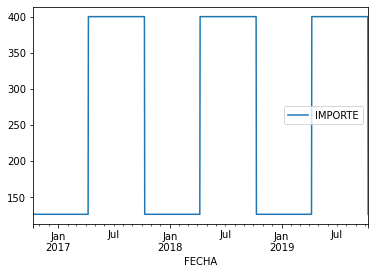

In [50]:
#esto no ira en produccion
prueba_df.plot()
pyplot.show()

In [51]:
del prueba_df

In [52]:
# hacemos el dataframe del dia de pago del seguro del coche hasta el año siguiente al de last_date_tstamp

In [53]:
last_date_tstamp

Timestamp('2020-07-26 00:00:00')

In [54]:
transacciones_78_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10

In [55]:
# nos quedamos con el año de last_date_tstamp
# esto no ira en produccion
type(last_date_tstamp.year), last_date_tstamp.year

(int, 2020)

In [56]:
transacciones_78_df.index[-1]

Timestamp('2019-10-11 00:00:00')

In [57]:
# nos quedamos con el último año de transacciones_78_importe_forecast_df
# esto no ira en produccion
type(transacciones_78_df.index[-1].year), transacciones_78_df.index[-1].year

(int, 2019)

In [58]:
# extendemos dataframe del dia de pago del seguro hasta 1 año despues de la fecha de la ultima transaccion en cuenta
target_year = 1 + last_date_tstamp.year
target_year

2021

In [59]:
# hacemos la diferenca entre target_year y transacciones_78_importe_past_df.iloc[-1]['FECHA'].year para saber cuantos
# años tenemos q extender el dataframe anterior
numberOf_future_years = target_year - transacciones_78_df.index[-1].year
numberOf_future_years

2

In [60]:
# transacciones_78_forecast_df sera el dataframe donde guardaremos las futuras fechas de cobro (y las pasadas reales)
transacciones_78_forecast_df = transacciones_78_df.copy()
transacciones_78_forecast_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10

In [61]:
# calculo el 1er y ultimo dia del ultimo año
start_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 1, 1)
end_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 12, 31)

start_date_dtime, end_date_dtime

(datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2019, 12, 31, 0, 0))

In [62]:
# construyo la condicion para seleccionar las fechas entre el 1er y ultimo dia del ultimo año
after_start_date = transacciones_78_forecast_df.index >= start_date_dtime
before_end_date = transacciones_78_forecast_df.index <= end_date_dtime
between_two_dates = after_start_date & before_end_date

In [63]:
# construyo un dataframe solo con las fechas del ultimo año
transacciones_78_nextYear_df = transacciones_78_forecast_df.loc[between_two_dates]
transacciones_78_nextYear_df

IMPORTE
FECHA              
2019-04-10    400.0
2019-10-11    126.1

In [64]:
transacciones_78_nextYear_df.dtypes

IMPORTE    float64
dtype: object

In [65]:
type(transacciones_78_nextYear_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [66]:
# añadimos 1 año al indice
transacciones_78_nextYear_df.index += pandas.offsets.DateOffset(years=1)
transacciones_78_nextYear_df

IMPORTE
FECHA              
2020-04-10    400.0
2020-10-11    126.1

In [67]:
# añadimos las filas de transacciones_78_nextYear_df a las de transacciones_78_forecast_df
transacciones_78_forecast_df = transacciones_78_forecast_df.append(transacciones_78_nextYear_df)
transacciones_78_forecast_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10
2020-04-10   400.00
2020-10-11   126.10

In [68]:
# decrementamos el contador de años futuros
numberOf_future_years -= 1
numberOf_future_years

1

In [69]:
# borramos el dataframe q tiene solo las transacciones del ultimo año
del transacciones_78_nextYear_df

In [70]:
# repetimos las operaciones anteriores para añadir un año más hata el 2021

In [71]:
# calculo el 1er y ultimo dia del ultimo año
start_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 1, 1)
end_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 12, 31)
start_date_dtime, end_date_dtime

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 12, 31, 0, 0))

In [72]:
# construyo la condicion para seleccionar las fechas entre el 1er y ultimo dia del ultimo año
after_start_date = transacciones_78_forecast_df.index >= start_date_dtime
before_end_date = transacciones_78_forecast_df.index <= end_date_dtime
between_two_dates = after_start_date & before_end_date

In [73]:
# construyo un dataframe solo con las fechas del ultimo año
transacciones_78_nextYear_df = transacciones_78_forecast_df.loc[between_two_dates]
transacciones_78_nextYear_df

IMPORTE
FECHA              
2020-04-10    400.0
2020-10-11    126.1

In [74]:
# añadimos 1 año al indice
transacciones_78_nextYear_df.index += pandas.offsets.DateOffset(years=1)
transacciones_78_nextYear_df

IMPORTE
FECHA              
2021-04-10    400.0
2021-10-11    126.1

In [75]:
# añadimos las columnas de transacciones_78_nextYear_df a las de transacciones_78_forecast_df
transacciones_78_forecast_df = transacciones_78_forecast_df.append(transacciones_78_nextYear_df)
transacciones_78_forecast_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10
2020-04-10   400.00
2020-10-11   126.10
2021-04-10   400.00
2021-10-11   126.10

In [76]:
# decrementamos el contador de años futuros
numberOf_future_years -= 1
numberOf_future_years

0

In [77]:
# borramos el dataframe q tiene solo las transacciones del ultimo año
del transacciones_78_nextYear_df

In [78]:
"""
Y con esto ya tenemos el dataframe hecho para predecir próximas fechas de cobro e incluso también los respectivos importes
de cobro (proyecyando los del ultimo año con datos) si no queremos usar prophet para calcularlos
"""

'\nY con esto ya tenemos el dataframe hecho para predecir próximas fechas de cobro e incluso también los respectivos importes\nde cobro (proyecyando los del ultimo año con datos) si no queremos usar prophet para calcularlos\n'

In [79]:
# ahora vamos a hacer lo mismo que en el grupo de transacciones anteriores pero con un 'for' de forma automatica

# extendemos dataframe del dia de pago del seguro hasta 1 año despues de la fecha de la ultima transaccion en cuenta
target_year = 1 + last_date_tstamp.year

# hacemos la diferenca entre target_year y transacciones_78_importe_past_df.iloc[-1]['FECHA'].year para saber cuantos
# años tenemos q extender el dataframe anterior
numberOf_future_years = target_year - transacciones_78_df.index[-1].year

# transacciones_78_forecast_df sera el dataframe donde guardaremos las futuras fechas de cobro (y las pasadas reales)
transacciones_78_forecast_df = transacciones_78_df.copy()

while numberOf_future_years > 0:
	# calculo el 1er y ultimo dia del ultimo año
	start_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 1, 1)
	end_date_dtime = datetime(transacciones_78_forecast_df.index[-1].year, 12, 31)

	# construyo la condicion para seleccionar las fechas entre el 1er y ultimo dia del ultimo año
	after_start_date = transacciones_78_forecast_df.index >= start_date_dtime
	before_end_date = transacciones_78_forecast_df.index <= end_date_dtime
	between_two_dates = after_start_date & before_end_date

	# construyo un dataframe solo con las fechas del ultimo año
	transacciones_78_nextYear_df = transacciones_78_forecast_df.loc[between_two_dates]	

	# añadimos 1 año al indice
	transacciones_78_nextYear_df.index += pandas.offsets.DateOffset(years=1)
	
	# añadimos las filas de transacciones_78_nextYear_df a las de transacciones_78_forecast_df
	transacciones_78_forecast_df = transacciones_78_forecast_df.append(transacciones_78_nextYear_df)

	# decrementamos el contador de años futuros
	numberOf_future_years -= 1

	# borramos el dataframe q tiene solo las transacciones del ultimo año
	del transacciones_78_nextYear_df
    
transacciones_78_forecast_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10
2020-04-10   400.00
2020-10-11   126.10
2021-04-10   400.00
2021-10-11   126.10

In [80]:
# a continuacion vamos a estimar con prophet la serie temporal del importe con los datos del dataframe 
# 'transacciones_78_importe_past_df' ya que con el dataframe 'transacciones_78_forecast_df' ya tenemos estimados
# el importe y las fechas de cobro mediante la 'cuenta de la vieja'

# vamos a hacer la serie hasta la fecha de la ultima fila de 'transacciones_78_forecast_df'

In [81]:
prophet_train_df = transacciones_78_importe_past_df.copy()
prophet_train_df

IMPORTE      FECHA
0      126.13 2016-10-12
1      126.13 2016-10-13
2      126.13 2016-10-14
3      126.13 2016-10-15
4      126.13 2016-10-16
...       ...        ...
1090   400.00 2019-10-07
1091   400.00 2019-10-08
1092   400.00 2019-10-09
1093   400.00 2019-10-10
1094   126.10 2019-10-11

[1095 rows x 2 columns]

In [82]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [83]:
# Fit Prophet Model

In [84]:
# reordenamos las columnas de prophet_train_df
prophet_train_df = prophet_train_df[['FECHA', 'IMPORTE']]
prophet_train_df

FECHA  IMPORTE
0    2016-10-12   126.13
1    2016-10-13   126.13
2    2016-10-14   126.13
3    2016-10-15   126.13
4    2016-10-16   126.13
...         ...      ...
1090 2019-10-07   400.00
1091 2019-10-08   400.00
1092 2019-10-09   400.00
1093 2019-10-10   400.00
1094 2019-10-11   126.10

[1095 rows x 2 columns]

In [85]:
# prepare expected column names
prophet_train_df.columns = ['ds', 'y']
prophet_train_df

ds       y
0    2016-10-12  126.13
1    2016-10-13  126.13
2    2016-10-14  126.13
3    2016-10-15  126.13
4    2016-10-16  126.13
...         ...     ...
1090 2019-10-07  400.00
1091 2019-10-08  400.00
1092 2019-10-09  400.00
1093 2019-10-10  400.00
1094 2019-10-11  126.10

[1095 rows x 2 columns]

In [86]:
# esto no ira en produccion: comprobamos q 'ds' es 'datetime'
prophet_train_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

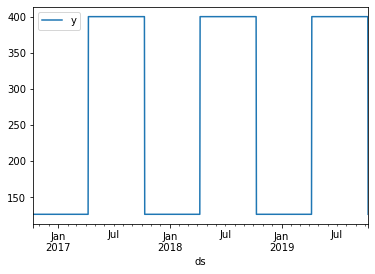

In [87]:
# esto no ira en produccion
# gca stands for 'get current axis'
prophet_train_df.plot(kind='line', x='ds', y='y', ax=pyplot.gca())
pyplot.show()

In [88]:
# define the model
model = Prophet()

In [89]:
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
# vamos a pedirle a prophet que haga la prediccion para el rango de fechas de 'transacciones_78_forecast_df'
future_out_sample = transacciones_78_forecast_df.copy()
future_out_sample

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10
2020-04-10   400.00
2020-10-11   126.10
2021-04-10   400.00
2021-10-11   126.10

In [91]:
# hacemos una columna 'FECHA' con el indice
future_out_sample['FECHA'] = future_out_sample.index
future_out_sample

IMPORTE      FECHA
FECHA                         
2016-10-13   123.10 2016-10-13
2017-10-11   124.74 2017-10-11
2018-10-11   126.13 2018-10-11
2019-04-10   400.00 2019-04-10
2019-10-11   126.10 2019-10-11
2020-04-10   400.00 2020-04-10
2020-10-11   126.10 2020-10-11
2021-04-10   400.00 2021-04-10
2021-10-11   126.10 2021-10-11

In [92]:
# hacemos un drop de la columna 'IMPORTE'
future_out_sample.drop(columns='IMPORTE', inplace=True)
future_out_sample

FECHA
FECHA                
2016-10-13 2016-10-13
2017-10-11 2017-10-11
2018-10-11 2018-10-11
2019-04-10 2019-04-10
2019-10-11 2019-10-11
2020-04-10 2020-04-10
2020-10-11 2020-10-11
2021-04-10 2021-04-10
2021-10-11 2021-10-11

In [93]:
# calculamos el rango de fechas de la estimacion
idx = date_range(start=future_out_sample.FECHA.min(), end=future_out_sample.FECHA.max())
idx

DatetimeIndex(['2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-22',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=1825, freq='D')

In [94]:
# esto no ira en produccion: comprobamos q el indice del dataframe es del formato 'DatetimeIndex'
type(future_out_sample.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [95]:
# rehacemos el indice de future_out_sample de acuerdo a las fechas de idx
future_out_sample = future_out_sample.reindex(idx)
future_out_sample

FECHA
2016-10-13 2016-10-13
2016-10-14        NaT
2016-10-15        NaT
2016-10-16        NaT
2016-10-17        NaT
...               ...
2021-10-07        NaT
2021-10-08        NaT
2021-10-09        NaT
2021-10-10        NaT
2021-10-11 2021-10-11

[1825 rows x 1 columns]

In [96]:
# hacemos una columna con el nuevo indice
future_out_sample.reset_index(drop=False, inplace=True)
future_out_sample

index      FECHA
0    2016-10-13 2016-10-13
1    2016-10-14        NaT
2    2016-10-15        NaT
3    2016-10-16        NaT
4    2016-10-17        NaT
...         ...        ...
1820 2021-10-07        NaT
1821 2021-10-08        NaT
1822 2021-10-09        NaT
1823 2021-10-10        NaT
1824 2021-10-11 2021-10-11

[1825 rows x 2 columns]

In [97]:
# hacemos un drop de la columna 'FECHA'
future_out_sample.drop(columns='FECHA', inplace=True)
future_out_sample

index
0    2016-10-13
1    2016-10-14
2    2016-10-15
3    2016-10-16
4    2016-10-17
...         ...
1820 2021-10-07
1821 2021-10-08
1822 2021-10-09
1823 2021-10-10
1824 2021-10-11

[1825 rows x 1 columns]

In [98]:
# renombramos la columna del dataframe a 'ds'
future_out_sample.columns = ['ds']
future_out_sample

ds
0    2016-10-13
1    2016-10-14
2    2016-10-15
3    2016-10-16
4    2016-10-17
...         ...
1820 2021-10-07
1821 2021-10-08
1822 2021-10-09
1823 2021-10-10
1824 2021-10-11

[1825 rows x 1 columns]

In [99]:
# esto no ira en produccion: comprobamos que ds es del tipo datetime64
future_out_sample.dtypes

ds    datetime64[ns]
dtype: object

In [100]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample)

In [101]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds        yhat  yhat_lower  yhat_upper
0    2016-10-13  217.867811  184.750348  253.471102
1    2016-10-14  201.993551  168.787893  237.572296
2    2016-10-15  189.156819  156.065557  224.241038
3    2016-10-16  176.087160  141.221019  212.316407
4    2016-10-17  165.530268  131.761886  202.579429
...         ...         ...         ...         ...
1820 2021-10-07  318.265078  286.386999  353.041220
1821 2021-10-08  302.354899  265.930234  338.755462
1822 2021-10-09  288.597448  252.962712  323.280714
1823 2021-10-10  273.734963  236.822924  308.184163
1824 2021-10-11  260.540990  226.255749  295.684386

[1825 rows x 4 columns]


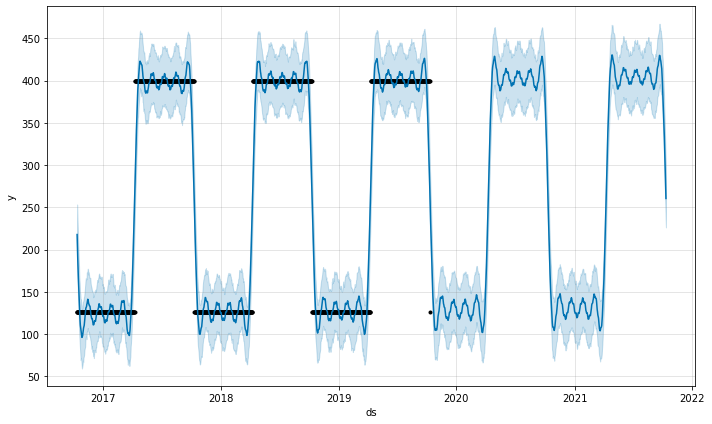

In [102]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [103]:
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0    2016-10-13  217.867811  184.750348  253.471102
1    2016-10-14  201.993551  168.787893  237.572296
2    2016-10-15  189.156819  156.065557  224.241038
3    2016-10-16  176.087160  141.221019  212.316407
4    2016-10-17  165.530268  131.761886  202.579429
...         ...         ...         ...         ...
1820 2021-10-07  318.265078  286.386999  353.041220
1821 2021-10-08  302.354899  265.930234  338.755462
1822 2021-10-09  288.597448  252.962712  323.280714
1823 2021-10-10  273.734963  236.822924  308.184163
1824 2021-10-11  260.540990  226.255749  295.684386

[1825 rows x 4 columns]

In [104]:
# A continuacion con los datos anteriores vamos a hacer la parte del algoritmo que hace las predicciones

In [105]:
last_date_tstamp

Timestamp('2020-07-26 00:00:00')

In [121]:
# pedimos la fecha al usuario (en producción tomamos la fecha del sistema)
year = input('year: ')
month = input('month: ')
day = input('day: ')

year: 2020
month: 7
day: 26


In [122]:
# pasamos la fecha a string
system_date_str = year + '-' + month + '-' + day
system_date_str

'2020-7-26'

In [123]:
# pasamos la fecha al formato datetime
system_date_obj = datetime.strptime(system_date_str, '%Y-%m-%d')
system_date_obj

datetime.datetime(2020, 7, 26, 0, 0)

In [124]:
# en transacciones_78_forecast_df tenemos la fecha de los próximos recibos y su importe (proyectados del pasado)
# hasta 1 año después de la fecha del sistema
transacciones_78_forecast_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10
2020-04-10   400.00
2020-10-11   126.10
2021-04-10   400.00
2021-10-11   126.10

In [125]:
# en transacciones_78_df tenemos el histórico de la fecha de los recibos y su importe
transacciones_78_df

IMPORTE
FECHA              
2016-10-13   123.10
2017-10-11   124.74
2018-10-11   126.13
2019-04-10   400.00
2019-10-11   126.10

In [126]:
# en forecast_df tenemos el importe de los próximos recibos estimada con prophet
# hasta 1 año después de la fecha del sistema
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2016-10-13  260.671167  184.750348  253.471102   260.671167   260.671167   
1    2016-10-14  260.683478  168.787893  237.572296   260.683478   260.683478   
2    2016-10-15  260.695789  156.065557  224.241038   260.695789   260.695789   
3    2016-10-16  260.708100  141.221019  212.316407   260.708100   260.708100   
4    2016-10-17  260.720411  131.761886  202.579429   260.720411   260.720411   
...         ...         ...         ...         ...          ...          ...   
1820 2021-10-07  269.490470  286.386999  353.041220   268.313618   270.766485   
1821 2021-10-08  269.494720  265.930234  338.755462   268.314419   270.774497   
1822 2021-10-09  269.498971  252.962712  323.280714   268.315219   270.781704   
1823 2021-10-10  269.503221  236.822924  308.184163   268.316096   270.788593   
1824 2021-10-11  269.507471  226.255749  295.684386   268.317423   270.794650   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -42.803356            -42.803356            -42.803356 -0.196092   
1         -58.689927            -58.689927            -58.689927 -1.901312   
2         -71.538970            -71.538970            -71.538970 -1.084088   
3         -84.620940            -84.620940            -84.620940 -1.141205   
4         -95.190143            -95.190143            -95.190143  0.557352   
...              ...                   ...                   ...       ...   
1820       48.774608             48.774608             48.774608 -0.196092   
1821       32.860178             32.860178             32.860178 -1.901312   
1822       19.098478             19.098478             19.098478 -1.084088   
1823        4.231742              4.231742              4.231742 -1.141205   
1824       -8.966481             -8.966481             -8.966481  0.557352   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0        -0.196092     -0.196092 -42.607264    -42.607264    -42.607264   
1        -1.901312     -1.901312 -56.788616    -56.788616    -56.788616   
2        -1.084088     -1.084088 -70.454883    -70.454883    -70.454883   
3        -1.141205     -1.141205 -83.479735    -83.479735    -83.479735   
4         0.557352      0.557352 -95.747495    -95.747495    -95.747495   
...            ...           ...        ...           ...           ...   
1820     -0.196092     -0.196092  48.970700     48.970700     48.970700   
1821     -1.901312     -1.901312  34.761490     34.761490     34.761490   
1822     -1.084088     -1.084088  20.182566     20.182566     20.182566   
1823     -1.141205     -1.141205   5.372947      5.372947      5.372947   
1824      0.557352      0.557352  -9.523833     -9.523833     -9.523833   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1820                   0.0                         0.0   
1821                   0.0                         0.0   
1822                   0.0                         0.0   
1823                   0.0                         0.0   
1824                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  217.867811  
1                            0.0  201.993551  
2                            0.0  189.156819  
3                            0.0  176.087160  
4                            0.0  165.530268  
...                          ...         ...  
1820                         0.0  318.265078  
1821                         0.0  302.354899  
1822                         0.0  288.597448  
1823                         0.0  2

In [127]:
# hacemos un bucle desde la fecha del sistema; incrementándola hasta que encontremos la fecha del próximo recibo en el
# indice transacciones_78_forecast_df

In [128]:
# calculamos el rango de fechas del bucle for para buscar las fechas de los próximos recibos
idx = date_range(start=system_date_obj, end=transacciones_78_forecast_df.index.max())
idx

DatetimeIndex(['2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
               '2020-08-03', '2020-08-04',
               ...
               '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', length=443, freq='D')

In [129]:
# inicializamos la variable de la fecha del próximo recibo
next_bill_date_obj = system_date_obj
next_bill_date_obj

datetime.datetime(2020, 7, 26, 0, 0)

In [130]:
# buscamos la fecha del próximo recibo
for date_obj in idx:
    if date_obj in transacciones_78_forecast_df.index:
        next_bill_date_obj = date_obj
        break
        
next_bill_date_obj

Timestamp('2020-10-11 00:00:00', freq='D')

In [131]:
# obtenemos el importe del recibo del dataframe transacciones_78_forecast_df para next_bill_date_obj
next_bill_amount = float(transacciones_78_forecast_df.loc[next_bill_date_obj, 'IMPORTE'])
next_bill_amount

126.1

In [132]:
# calcula el importe del recibo del dataframe forecast_df retrasando la fecha de petición unos días
# vamos a pedirle la estimación a prophet posponiendo la fecha de petición 11 días respecto a next_bill_date_obj
next_bill_fbp_date_obj = next_bill_date_obj + timedelta(days=11)
next_bill_fbp_date_obj

Timestamp('2020-10-22 00:00:00', freq='D')

In [133]:
next_bill_fbp_amount = float(forecast_df.loc[forecast_df['ds'] == next_bill_fbp_date_obj]['yhat'])
next_bill_fbp_amount

125.15255517113039

In [134]:
# chequeamos si la fecha del próximo recibo está en el mes siguiente al de la petición para dar aviso
next_month_bool = False
if next_bill_date_obj.month - system_date_obj.month == 1:
    next_month_bool = True

next_month_bool

False

In [135]:
# chequeamos si hay un recibo el mismo dia (+/- 3 dias) y cantidad next_bill_date_obj en transacciones_78_df y si la
# diferencia entre next_bill_date_obj y esta fecha encontrada es igual o menor a 1 año para dar la predicción como real
last_year_bool = False
if next_bill_amount in transacciones_78_df['IMPORTE'].tolist():
    last_bill_date_obj = max(transacciones_78_df.index[transacciones_78_df['IMPORTE'] == next_bill_amount].tolist())
    if abs(next_bill_date_obj.day - last_bill_date_obj.day) <= 3 & \
            next_bill_date_obj.year - last_bill_date_obj.year <= 1:
        last_year_bool = True
        
last_year_bool

True

In [142]:
print()
print('Fecha sistema:\t\t\t\t\t', system_date_str)
next_bill_date_str = next_bill_date_obj.strftime('%Y-%m-%d')
print('Fecha próximo recibo:\t\t\t\t', next_bill_date_str)
last_bill_date_str = last_bill_date_obj.strftime('%Y-%m-%d')
print('Fecha último recibo equivalente (mismo importe):', last_bill_date_str)
print()
print('Importe próximo recibo (proyectado):\t\t', int(next_bill_amount), 'eur')
print('Importe próximo recibo (fprophet delay 11 dias):', int(next_bill_fbp_amount), 'eur')
print()
print('Aviso recibo real (anterior en último año):\t', last_year_bool)
print('Aviso recibo mes siguiente:\t\t\t', next_month_bool)
print('Aviso definitivo recibo mes siguiente\t\t', last_year_bool & next_month_bool)
print()
print(
    'NB(1): La estimación con fbprophet puede ser errónea si hay dos recibos distintos dentro del intervalo del delay.')
print('NB(2): El delay de la estimación con fbprophet puede dar mayor error con datos con mayor variación de importes.')
print('NB(3): Mejor coger el importe proyectado que es más preciso que el de fbprophet.')


Fecha sistema:					 2020-7-26
Fecha próximo recibo:				 2020-10-11
Fecha último recibo equivalente (mismo importe): 2019-10-11

Importe próximo recibo (proyectado):		 126 eur
Importe próximo recibo (fprophet delay 11 dias): 125 eur

Aviso recibo real (anterior en último año):	 True
Aviso recibo mes siguiente:			 False
Aviso definitivo recibo mes siguiente		 False

NB(1): La estimación con fbprophet puede ser errónea si hay dos recibos distintos dentro del intervalo del delay.
NB(2): El delay de la estimación con fbprophet puede dar mayor error con datos con mayor variación de importes.
NB(3): Mejor coger el importe proyectado que es más preciso que el de fbprophet.
